#### Data Preprocessing 

* Converting labels from (-1,1) to (0,1) is not a nencessary step but as we will use sigmoid funtion as activation choice given its a binary classificatio.It ouputs the values between 0 and 1 which are ideal labels of 0 and 1 in binary classification.
* Loss function: binary cross-entropy will be used for classification task,is essentialy designned for labels 0 and 1 and we dont want it to behave abnormaly.


In [1]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df=pd.read_csv("diabetes_scaled.csv")
X = df.drop('Outcome', axis=1).astype(float)
y = df['Outcome'].astype(int)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Split train+validation into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Convert labels from (-1, 1) to (0, 1)
y_train = np.where(y_train == -1, 0, 1)
y_val = np.where(y_val == -1, 0, 1)



In [6]:
y_train.shape,y_val.shape

((614,), (154,))

In [7]:
y.value_counts()

Outcome
 1    500
-1    268
Name: count, dtype: int64

### Baseline model or dry run without any optimization 

Epoch 1/50


c:\Users\shiva\miniconda3\envs\UMLT\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6179 - loss: 70.2462 - val_accuracy: 0.6429 - val_loss: 62.0233
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6395 - loss: 66.9233 - val_accuracy: 0.6429 - val_loss: 59.4937
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6559 - loss: 54.5643 - val_accuracy: 0.6429 - val_loss: 57.0010
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6818 - loss: 52.0246 - val_accuracy: 0.6429 - val_loss: 54.4272
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6519 - loss: 53.2005 - val_accuracy: 0.6429 - val_loss: 51.8166
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6246 - loss: 56.7721 - val_accuracy: 0.6429 - val_loss: 49.3090
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6544 - loss: 47.1569 - val_accuracy: 0.6429 - val_loss: 46.9796
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6607 - loss: 47.0833 - val_accuracy: 0.6429 - val_l

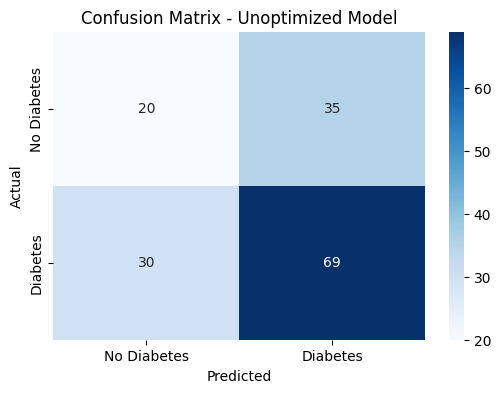

In [7]:

import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Simple Perceptron

base_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))  
])

# Compile the base model
base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the base model
history_base_model = base_model.fit(X_train, y_train,
                                    epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Save the unoptimized model
base_model.save('base_perceptron_model.keras')

# Evaluate the model on training set
train_eval_unopt = base_model.evaluate(X_train, y_train)
print(f"Base model Training accuracy: {train_eval_unopt[1]}")

# Metrics on train set
y_train_pred_unopt = (base_model.predict(X_train) > 0.5).astype(int)
train_accuracy_unopt = accuracy_score(y_train, y_train_pred_unopt)
train_precision_unopt = precision_score(y_train, y_train_pred_unopt)
train_recall_unopt = recall_score(y_train, y_train_pred_unopt)
train_f1_unopt = f1_score(y_train, y_train_pred_unopt)

print(f"Baseline Model training data Metrics:")
print(f"Accuracy: {train_accuracy_unopt}")
print(f"Precision: {train_precision_unopt}")
print(f"Recall: {train_recall_unopt}")
print(f"F1-score: {train_f1_unopt}")

# Evaluate the model on validation set
val_eval_unopt = base_model.evaluate(X_val, y_val)
print(f"Base model Validation accuracy: {val_eval_unopt[1]}")

# Metrics on Validation Set all with probability above 0.5 as one class 
y_val_pred_unopt = (base_model.predict(X_val) > 0.5).astype(int)
val_accuracy_unopt = accuracy_score(y_val, y_val_pred_unopt)
val_precision_unopt = precision_score(y_val, y_val_pred_unopt)
val_recall_unopt = recall_score(y_val, y_val_pred_unopt)
val_f1_unopt = f1_score(y_val, y_val_pred_unopt)

print(f"Baseline Model Validation Metrics:")
print(f"Accuracy: {val_accuracy_unopt}")
print(f"Precision: {val_precision_unopt}")
print(f"Recall: {val_recall_unopt}")
print(f"F1-score: {val_f1_unopt}")

# Confusion Matrix for Validation Set (Baseline Model)
conf_matrix_unopt = confusion_matrix(y_val, y_val_pred_unopt)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_unopt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Unoptimized Model')
plt.show()


Epoch 1/60


c:\Users\shiva\miniconda3\envs\UMLT\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/20 ━━━━━━━━━━━━━━━━━━━━ 10s 561ms/step - accuracy: 0.3750 - loss: 12.7017
Epoch 1: val_accuracy improved from -inf to 0.36364, saving model to optimized_model1.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3422 - loss: 11.6915 - val_accuracy: 0.3636 - val_loss: 10.8171
Epoch 2/60
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3125 - loss: 12.2883
Epoch 2: val_accuracy did not improve from 0.36364
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3618 - loss: 10.8929 - val_accuracy: 0.3636 - val_loss: 10.3274
Epoch 3/60
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3125 - loss: 14.2139
Epoch 3: val_accuracy did not improve from 0.36364
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3375 - loss: 10.8696 - val_accuracy: 0.3636 - val_loss: 9.8458
Epoch 4/60
 1/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3438 - loss: 9.5607
Epoch 4: val_accuracy improved from 0.36364 to 0.37013, saving model to optimized_model1.keras
20/20 ━━━━━━━━━━━━━━━━━━━━

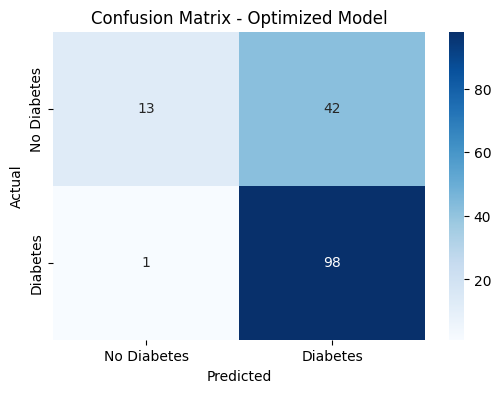

In [11]:
# Optimized Perceptron Model with Adam optimizer and learning rate
optimized_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))  
])

# Compile the optimized model
optimized_model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and checkpoint
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('optimized_model1.keras', monitor='val_accuracy', 
                                                         save_best_only=True, mode='max', verbose=1)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)


optimized_model1.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_val, y_val),
                                        callbacks=[early_stopping_callback, checkpoint_callback])

optimized_model1.save('optimized_model1.keras')

# Load the best model
optimized_model1.load_weights('optimized_model1.keras')

# Evaluate the model on training set
train_eval_opt = optimized_model1.evaluate(X_train, y_train)
print(f"Optimized Training accuracy: {train_eval_opt[1]}")

# Metrics on train set
y_train_pred_unopt = (optimized_model1.predict(X_train) > 0.5).astype(int)
train_accuracy_unopt = accuracy_score(y_train, y_train_pred_unopt)
train_precision_unopt = precision_score(y_train, y_train_pred_unopt)
train_recall_unopt = recall_score(y_train, y_train_pred_unopt)
train_f1_unopt = f1_score(y_train, y_train_pred_unopt)

print(f"Baseline Model training data Metrics:")
print(f"Accuracy: {train_accuracy_unopt}")
print(f"Precision: {train_precision_unopt}")
print(f"Recall: {train_recall_unopt}")
print(f"F1-score: {train_f1_unopt}")
# Evaluate the model on validation set
val_eval_opt = optimized_model1.evaluate(X_val, y_val)
print(f"Optimized Validation accuracy: {val_eval_opt[1]}")

# Metrics on Validation Set
y_val_pred_opt = (optimized_model1.predict(X_val) > 0.5).astype(int)
val_accuracy_opt = accuracy_score(y_val, y_val_pred_opt)
val_precision_opt = precision_score(y_val, y_val_pred_opt)
val_recall_opt = recall_score(y_val, y_val_pred_opt)
val_f1_opt = f1_score(y_val, y_val_pred_opt)

print(f"Optimized Model Validation Metrics:")
print(f"Accuracy: {val_accuracy_opt}")
print(f"Precision: {val_precision_opt}")
print(f"Recall: {val_recall_opt}")
print(f"F1-score: {val_f1_opt}")

# Confusion Matrix for Validation Set (Optimized Model)
conf_matrix_opt = confusion_matrix(y_val, y_val_pred_opt)
plt.figure(
    figsize=(6,4))
sns.heatmap(conf_matrix_opt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optimized Model')
plt.show()


Epoch 1/80


c:\Users\shiva\miniconda3\envs\UMLT\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/20 ━━━━━━━━━━━━━━━━━━━━ 10s 569ms/step - accuracy: 0.7500 - loss: 53.4174
Epoch 1: val_accuracy improved from -inf to 0.64286, saving model to optimized_model2.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6610 - loss: 73.1953 - val_accuracy: 0.6429 - val_loss: 73.8545
Epoch 2/80
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7500 - loss: 53.8229
Epoch 2: val_accuracy did not improve from 0.64286
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6637 - loss: 70.2920 - val_accuracy: 0.6429 - val_loss: 71.3180
Epoch 3/80
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6562 - loss: 79.4633
Epoch 3: val_accuracy did not improve from 0.64286
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6521 - loss: 72.9262 - val_accuracy: 0.6429 - val_loss: 68.7503
Epoch 4/80
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6875 - loss: 57.8473
Epoch 4: val_accuracy did not improve from 0.64286
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6442 - loss: 70

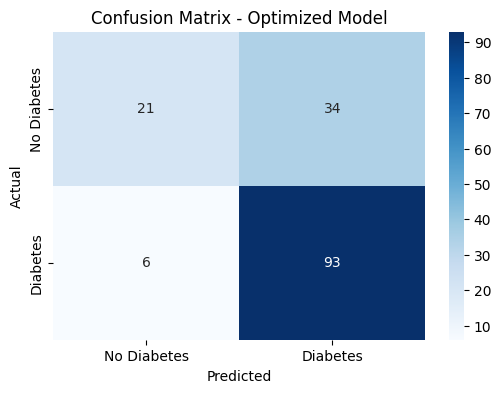

In [19]:
# Optimized Perceptron Model with L2 regularization and Adam optimizer
optimized_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],), 
                          kernel_regularizer=tf.keras.regularizers.l2(0.01))  # L2 Regularization
])

# Compile the optimized model
optimized_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and checkpoint
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('optimized_model2.keras', monitor='val_accuracy',
                                                         save_best_only=True, mode='max', verbose=1)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the optimized model
history_optimized = optimized_model2.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_val, y_val),
                                        callbacks=[early_stopping_callback, checkpoint_callback])

# Save the optimized model
optimized_model2.save('optimized_model2.keras')

# Load the best model
optimized_model2.load_weights('optimized_model2.keras')

# Evaluate the model on training set
train_eval_opt = optimized_model2.evaluate(X_train, y_train)
print(f"Optimized Training accuracy: {train_eval_opt[1]}")

# Metrics on train set
y_train_pred_unopt = (optimized_model1.predict(X_train) > 0.5).astype(int)
train_accuracy_unopt = accuracy_score(y_train, y_train_pred_unopt)
train_precision_unopt = precision_score(y_train, y_train_pred_unopt)
train_recall_unopt = recall_score(y_train, y_train_pred_unopt)
train_f1_unopt = f1_score(y_train, y_train_pred_unopt)

print(f"Optimized Model training data Metrics:")
print(f"Accuracy: {train_accuracy_unopt}")
print(f"Precision: {train_precision_unopt}")
print(f"Recall: {train_recall_unopt}")
print(f"F1-score: {train_f1_unopt}")
# Evaluate the model on validation set
val_eval_opt = optimized_model2.evaluate(X_val, y_val)
print(f"Optimized Validation accuracy: {val_eval_opt[1]}")

# Metrics on Validation Set
y_val_pred_opt = (optimized_model2.predict(X_val) > 0.5).astype(int)
val_accuracy_opt = accuracy_score(y_val, y_val_pred_opt)
val_precision_opt = precision_score(y_val, y_val_pred_opt)
val_recall_opt = recall_score(y_val, y_val_pred_opt)
val_f1_opt = f1_score(y_val, y_val_pred_opt)

print(f"Optimized Model Validation Metrics:")
print(f"Accuracy: {val_accuracy_opt}")
print(f"Precision: {val_precision_opt}")
print(f"Recall: {val_recall_opt}")
print(f"F1-score: {val_f1_opt}")




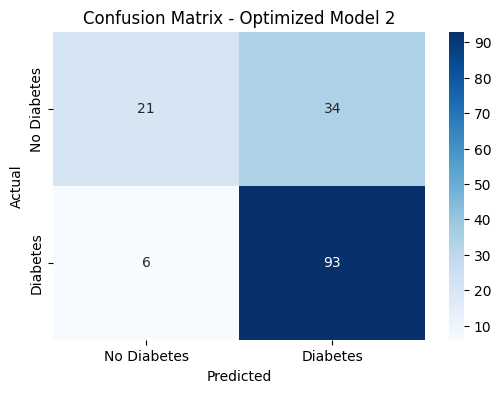

In [24]:
# Confusion Matrix for Validation Set (Optimized Model2)
conf_matrix_opt = confusion_matrix(y_val, y_val_pred_opt)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_opt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optimized Model 2')
plt.show()

### Choosing the best one among above 3 model

In [21]:
# Load the best model
optimized_model2.load_weights('optimized_model2.keras')
# Evaluate the model on validation set
val_eval_opt = optimized_model2.evaluate(X_val, y_val)
print(f"Optimized Validation accuracy: {val_eval_opt[1]}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7346 - loss: 0.5765 
Optimized Validation accuracy: 0.7402597665786743


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
Optimized Model Validation Metrics:
Accuracy: 0.7402597402597403
Precision: 0.7322834645669292
Recall: 0.9393939393939394
F1-score: 0.8230088495575221


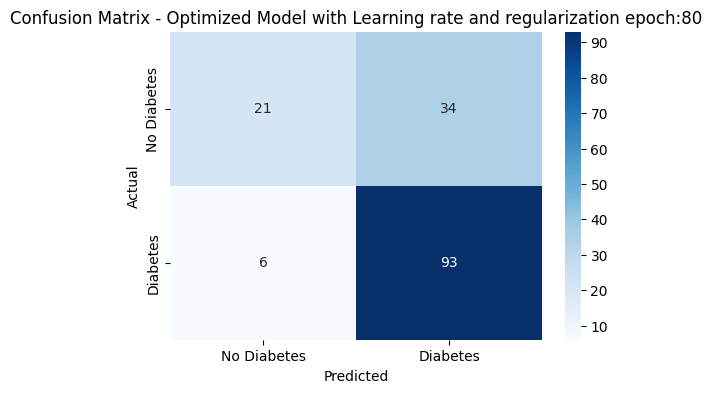

In [23]:
# Metrics on Validation Set
y_val_pred_opt = (optimized_model2.predict(X_val) > 0.5).astype(int)
val_accuracy_opt = accuracy_score(y_val, y_val_pred_opt)
val_precision_opt = precision_score(y_val, y_val_pred_opt)
val_recall_opt = recall_score(y_val, y_val_pred_opt)
val_f1_opt = f1_score(y_val, y_val_pred_opt)

print(f"Optimized Model Validation Metrics:")
print(f"Accuracy: {val_accuracy_opt}")
print(f"Precision: {val_precision_opt}")
print(f"Recall: {val_recall_opt}")
print(f"F1-score: {val_f1_opt}")

# Confusion Matrix for Validation Set (Optimized Mode2)
conf_matrix_opt = confusion_matrix(y_val, y_val_pred_opt)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_opt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optimized Model with Learning rate and regularization epoch:80')
plt.show()